In [1]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv(r"C:\Users\Akanksha\Desktop\ML prac\datasets\diabetes.csv")

In [3]:
 df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
df.shape

(768, 9)

In [8]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
 df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [16]:
x = df.drop('Outcome', axis = 1)
y = df['Outcome']

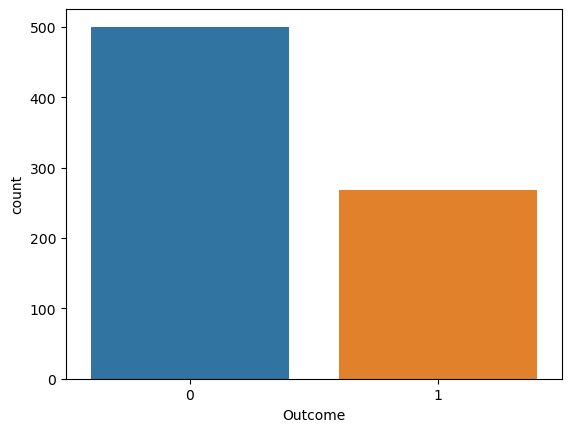

In [17]:
sns.countplot(x=y);

In [18]:

 y.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

In [25]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, random_state=0, test_size=0.30)


In [26]:
x.shape

(768, 8)

In [27]:
 x_train.shape

(537, 8)

In [28]:
 x_test.shape

(231, 8)

In [29]:
from sklearn.neighbors import KNeighborsClassifier

In [30]:
 knn =  KNeighborsClassifier(n_neighbors = 5)

In [31]:
 knn.fit(x_train, y_train)

KNeighborsClassifier()

In [32]:
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [33]:
 y_pred = knn.predict(x_test)

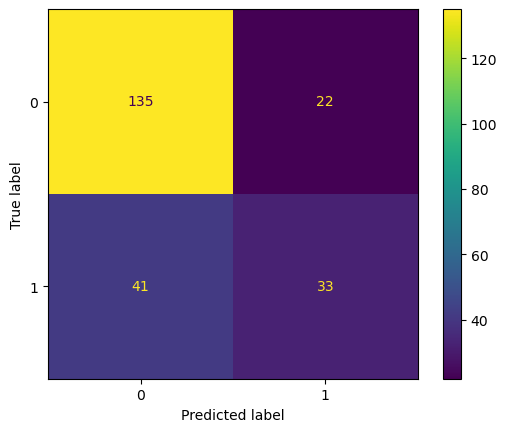

In [34]:
 ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [35]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.86      0.81       157
           1       0.60      0.45      0.51        74

    accuracy                           0.73       231
   macro avg       0.68      0.65      0.66       231
weighted avg       0.71      0.73      0.71       231



In [36]:
import matplotlib.pyplot as plt
import numpy as np

In [38]:
error = []
for k in range (1,41): 
    knn = KNeighborsClassifier(n_neighbors = k) 
    knn.fit(x_train, y_train) 
    pred=knn.predict(x_test) 
    error.append(np.mean(pred!=y_test))

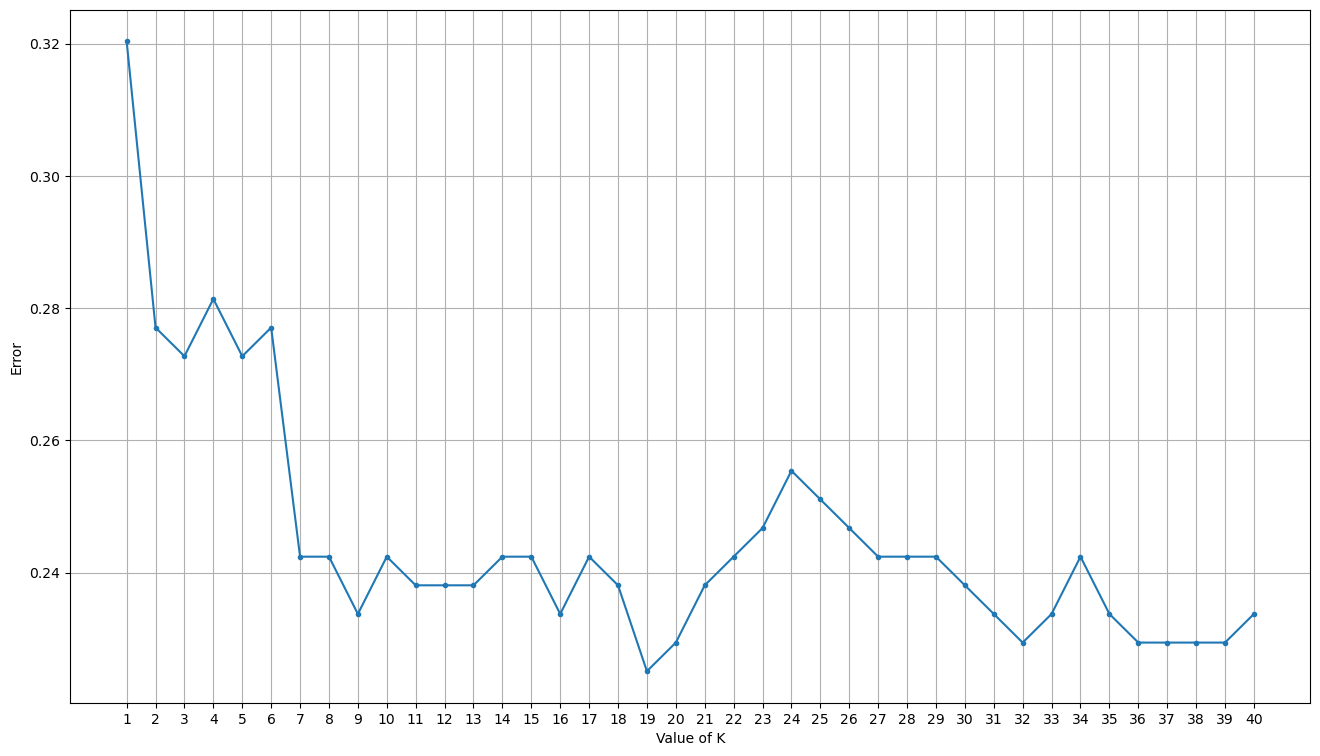

In [40]:
plt.figure(figsize=(16,9))
plt.xlabel('Value of K')
plt.ylabel('Error')
plt.grid()
plt.xticks(range(1,41))
plt.plot(range(1,41),error,marker='.')

In [41]:
knn = KNeighborsClassifier(n_neighbors = 33) 

In [42]:
knn.fit(x_train, y_train) 

KNeighborsClassifier(n_neighbors=33)

In [43]:
 y_pred=knn.predict(x_test)

In [44]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.84       157
           1       0.72      0.45      0.55        74

    accuracy                           0.77       231
   macro avg       0.75      0.68      0.70       231
weighted avg       0.76      0.77      0.75       231

